# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       response = requests.get(city_url)
       if (response.status_code == 200):
            #Extract data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country =city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | solsona
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | olinda
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | papao
Processing Record 8 of Set 1 | hayma'
Processing Record 9 of Set 1 | kuanda
Processing Record 10 of Set 1 | staritsa
Processing Record 11 of Set 1 | bargaal
Processing Record 12 of Set 1 | polyarnyy
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | mwene-ditu
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | 'aqrah
Processing Record 22 of Set 1 | toliara
Processing Record 23 of Set 1 | tadine


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,axim,4.8699,-2.2405,80.51,80,41,7.92,GH,1733685863
1,solsona,41.9940,1.5171,39.00,72,100,5.99,ES,1733685865
2,crane,31.3974,-102.3501,68.68,22,1,23.29,US,1733685596
3,saint-philippe,-21.3585,55.7679,77.16,85,18,10.27,RE,1733685867
4,olinda,-8.0089,-34.8553,83.93,70,75,13.80,BR,1733685868


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,axim,4.8699,-2.2405,80.51,80,41,7.92,GH,1733685863
1,solsona,41.9940,1.5171,39.00,72,100,5.99,ES,1733685865
2,crane,31.3974,-102.3501,68.68,22,1,23.29,US,1733685596
3,saint-philippe,-21.3585,55.7679,77.16,85,18,10.27,RE,1733685867
4,olinda,-8.0089,-34.8553,83.93,70,75,13.80,BR,1733685868


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

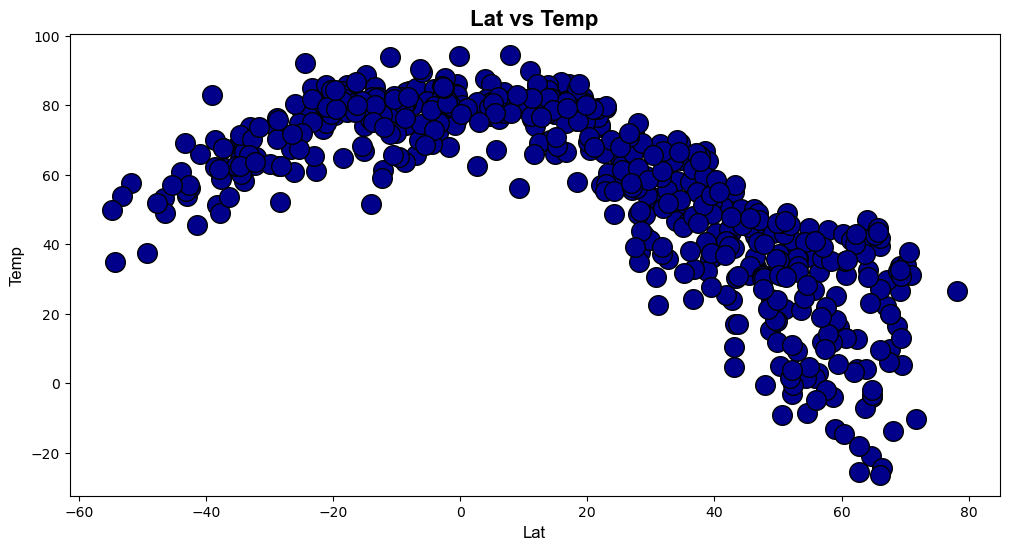

In [22]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="darkblue", edgecolor="black", s=200)


# Incorporate the other graph properties
# Add Labels/Title
plt.xlabel("Lat", fontfamily="Arial", fontsize=12)
plt.ylabel("Temp", fontfamily="Arial", fontsize=12)
plt.title("Lat vs Temp", fontweight="bold", fontsize=16, fontfamily="Arial")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

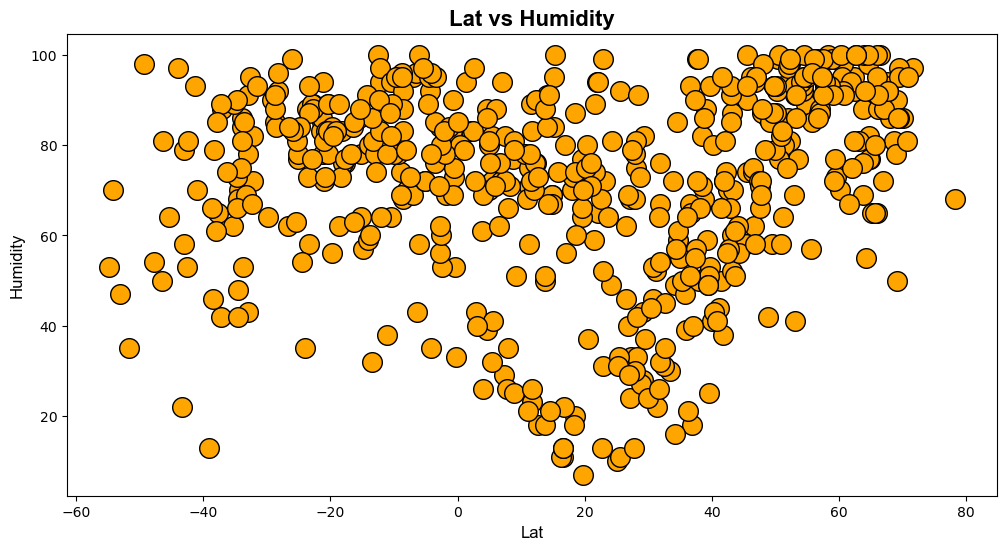

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="Orange", edgecolor="black", s=200)


# Incorporate the other graph properties
# Add Labels/Title
plt.xlabel("Lat", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Lat vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")



# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

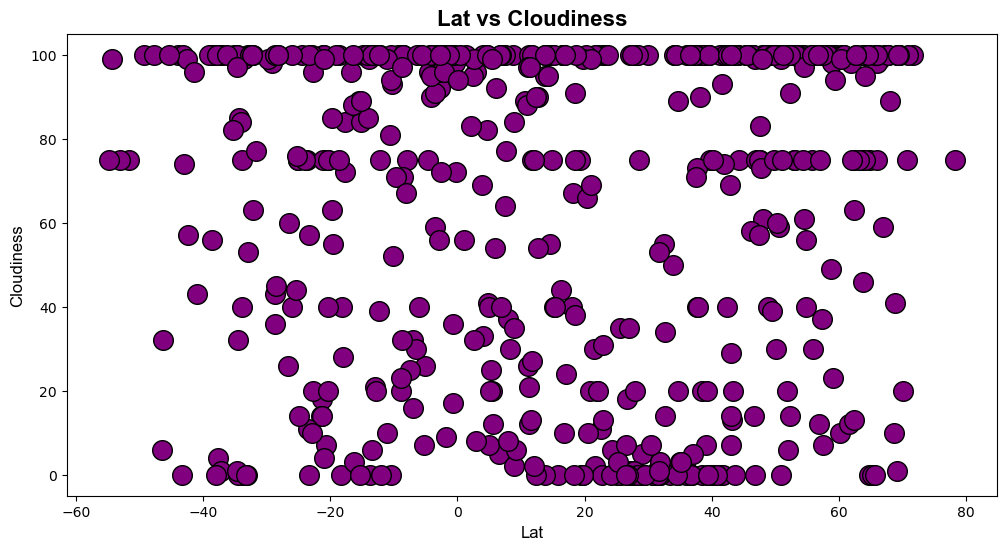

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="purple", edgecolor="black", s=200)


# Incorporate the other graph properties
# Add Labels/Title
plt.xlabel("Lat", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Lat vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

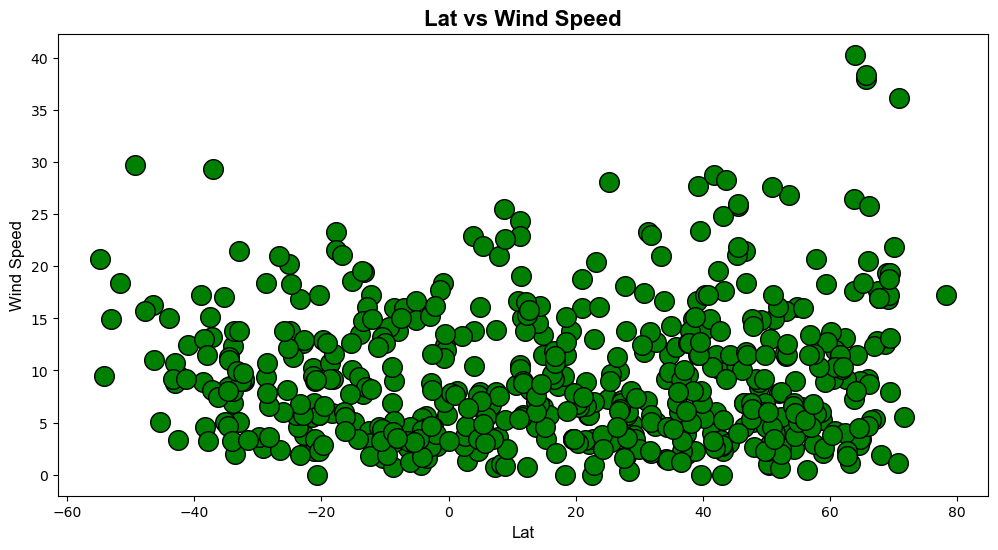

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="green", edgecolor="black", s=200)


# Incorporate the other graph properties
# Add Labels/Title
plt.xlabel("Lat", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Lat vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkblue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

# Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")

# Show/Save the Graph
    plt.show()

    

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,axim,4.8699,-2.2405,80.51,80,41,7.92,GH,1733685863
1,solsona,41.9940,1.5171,39.00,72,100,5.99,ES,1733685865
2,crane,31.3974,-102.3501,68.68,22,1,23.29,US,1733685596
3,kuanda,56.3161,116.0806,2.84,98,100,0.47,RU,1733685873
4,staritsa,56.5075,34.9354,32.07,99,100,5.48,RU,1733685874


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,77.16,85,18,10.27,RE,1733685867
1,olinda,-8.0089,-34.8553,83.93,70,75,13.80,BR,1733685868
2,edinburgh of the seven seas,-37.0676,-12.3116,61.75,88,100,29.28,SH,1733685870
3,papao,-17.7500,-149.5500,85.68,76,84,23.31,PF,1733685871
4,puerto natales,-51.7236,-72.4875,57.65,35,75,18.41,CL,1733685807


###  Temperature vs. Latitude Linear Regression Plot

-0.8467048730677432
y = -1.15x + 90.37


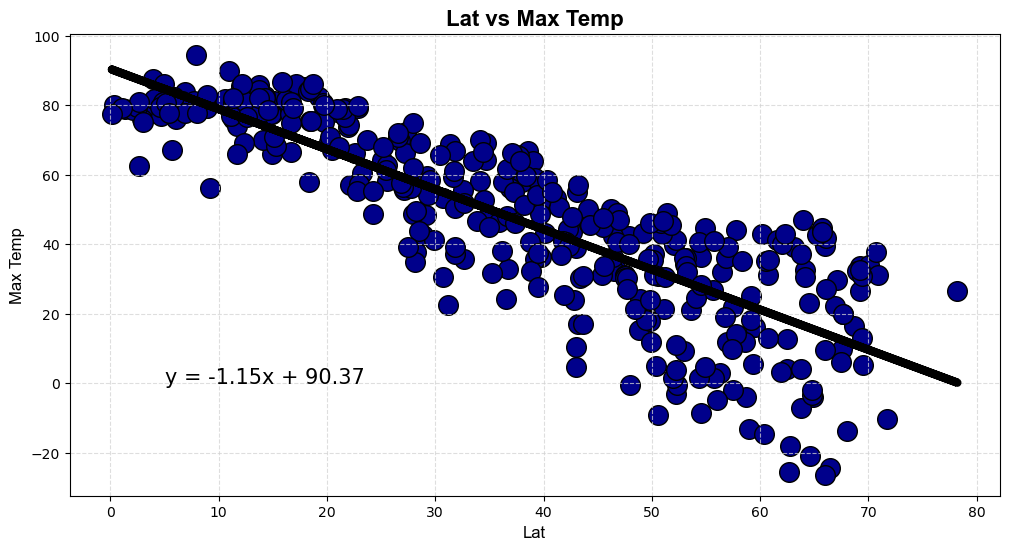

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Lat"
y_label = "Max Temp"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.6982082307978781
y = 0.55x + 84.28


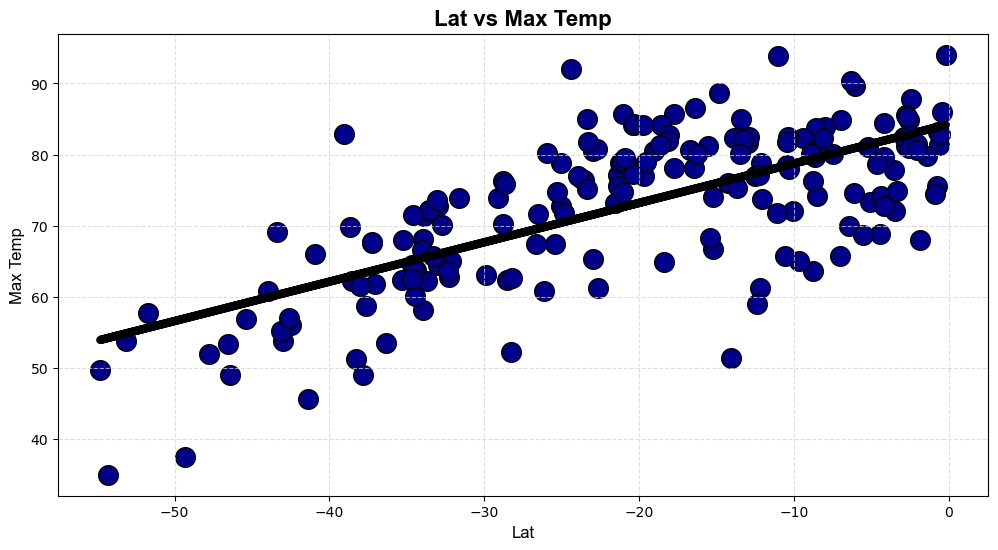

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Lat"
y_label = "Max Temp"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** For the Northern Hemisphere there is a negative line of regression which shows that the greater the latitude the colder it got.  Southern Hemisphere was the opposite with a positive line of regression which showed the greater the latitude the warmer the climate.

### Humidity vs. Latitude Linear Regression Plot

0.39726419934532065
y = 0.47x + 52.52


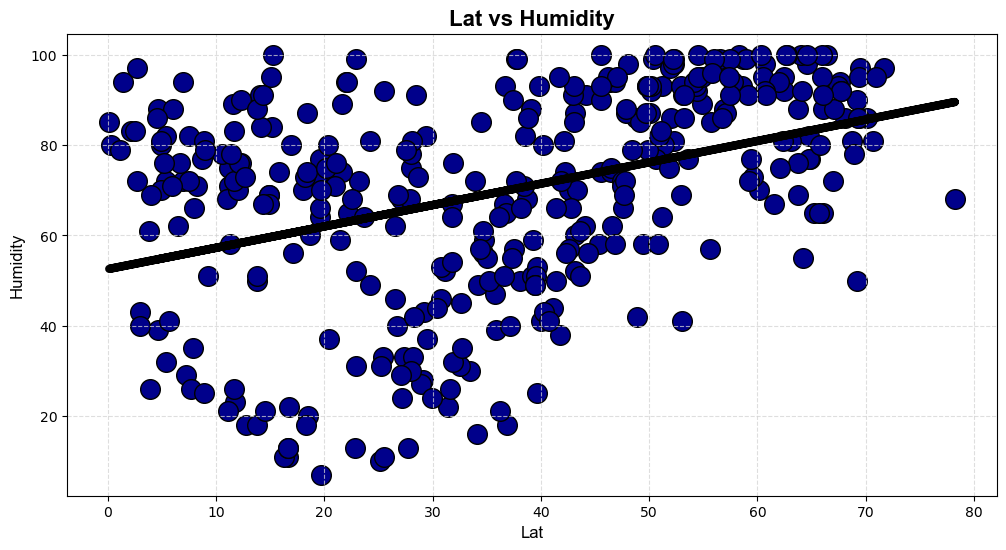

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Lat"
y_label = "Humidity"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.18927013496520495
y = 0.23x + 80.15


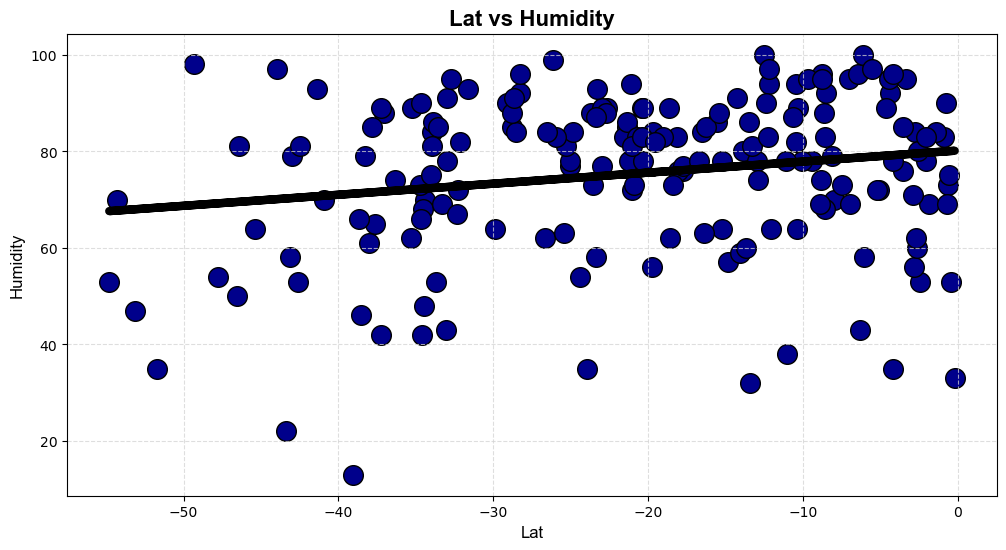

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Lat"
y_label = "Humidity"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** For the Northern Hemisphere the line of regression sloped in a positive direction which indicated the greater the latitude the more humid.  The Southern Hemisphere didn't show much of a change in the line of regression as it was steady between 60 and 80, with the greater the latitude the more humid.  

### Cloudiness vs. Latitude Linear Regression Plot

0.21199818006191115
y = 0.44x + 44.99


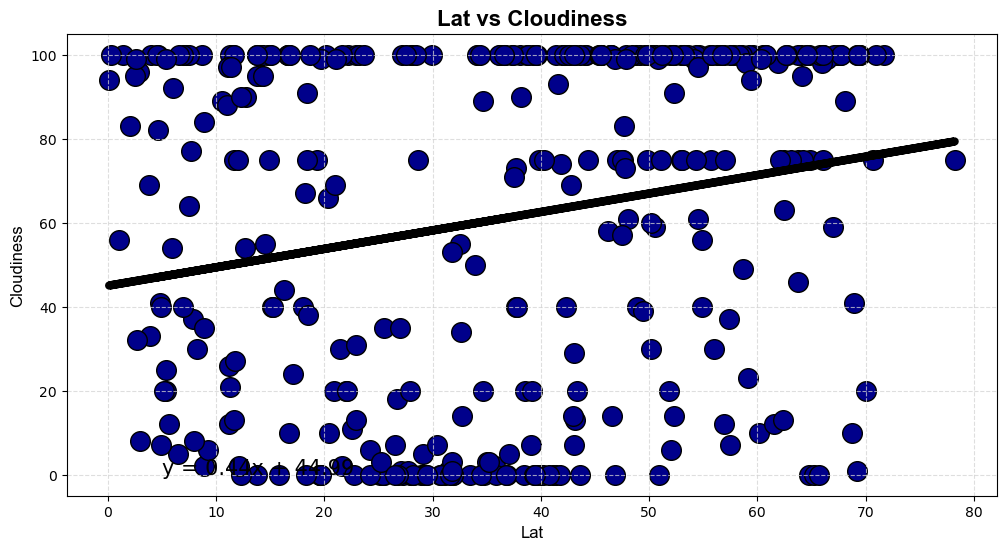

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Lat"
y_label = "Cloudiness"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.0392666742128194
y = 0.1x + 68.68


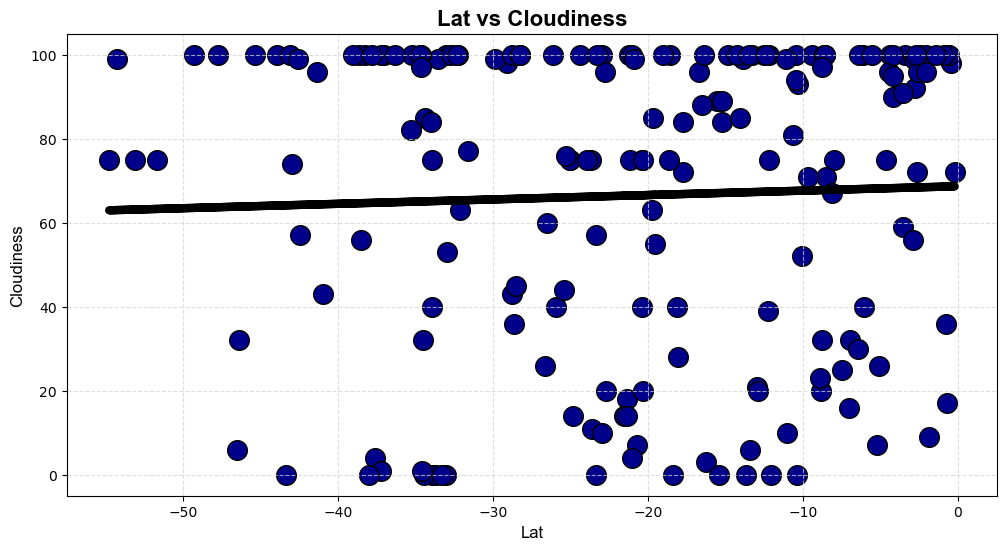

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Lat"
y_label = "Cloudiness"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** The r value for both were slightly above zero which indicated little to no difference in cloudiness per hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

0.15491276612907887
y = 0.06x + 7.51


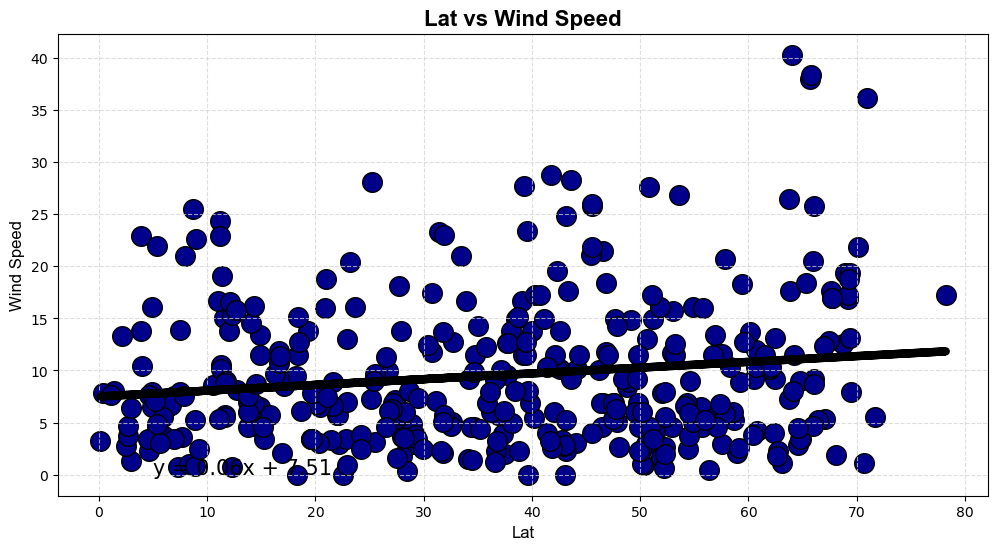

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Lat"
y_label = "Wind Speed"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.15491276612907887
y = 0.06x + 7.51


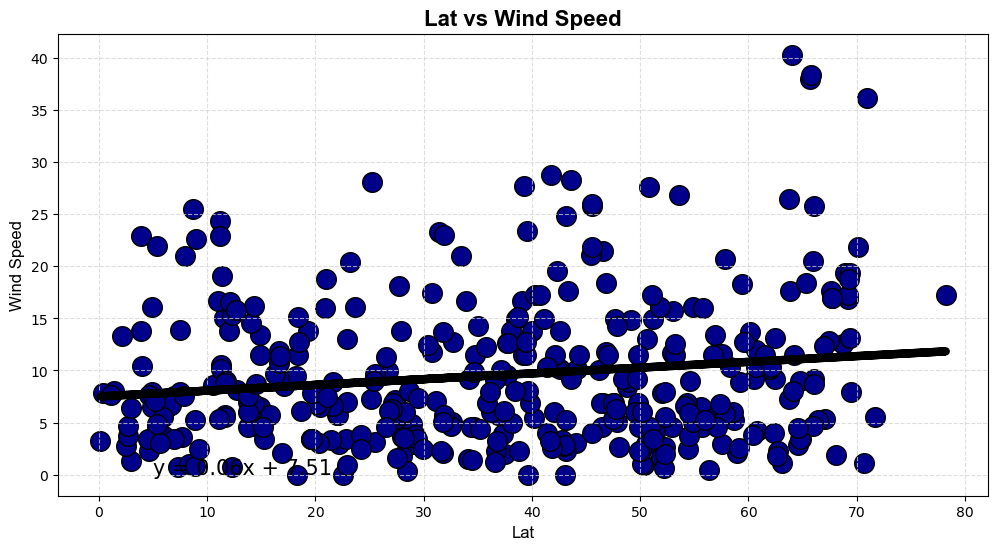

In [40]:
# Southern Hemisphere

x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Lat"
y_label = "Wind Speed"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** The graphs show that the Northern and Southern Hemispheres experience wind speeds between 5 and 15mph. There was no real difference as far as latitude for both Northern and Southern Hemispheres.